# 載入套件

In [ ]:
!pip install opencv-contrib-python -U

In [ ]:
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import cv2
import numpy as np
print(cv2.__version__)

# `numpy`的傅立葉轉換

In [ ]:
img = cv2.imread('lena.bmp',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('original')
plt.axis('off')
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('result')
plt.axis('off')
plt.show()

# 逆傅立葉轉換

In [ ]:
img = cv2.imread('boat.bmp',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
#print(iimg)
iimg = np.abs(iimg)
#print(iimg)
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(iimg, cmap = 'gray')
plt.title('iimg'),plt.axis('off')
plt.show()


# 用opencv實作傅立葉轉換

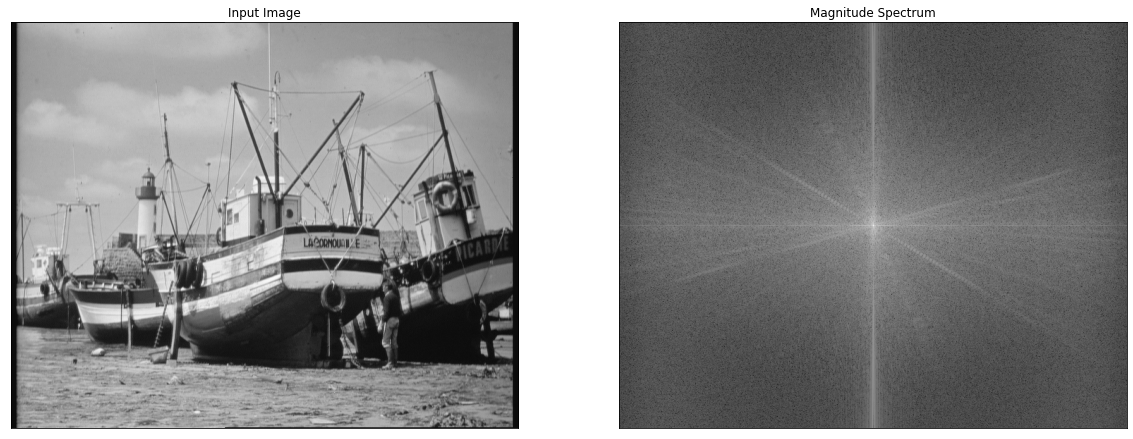

In [15]:
img = cv2.imread('boat.bmp',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fig, _ = plt.subplots(figsize = (20, 10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# 逆傅立葉轉換

(Text(0.5, 1.0, 'inverse'), (-0.5, 511.5, 511.5, -0.5))

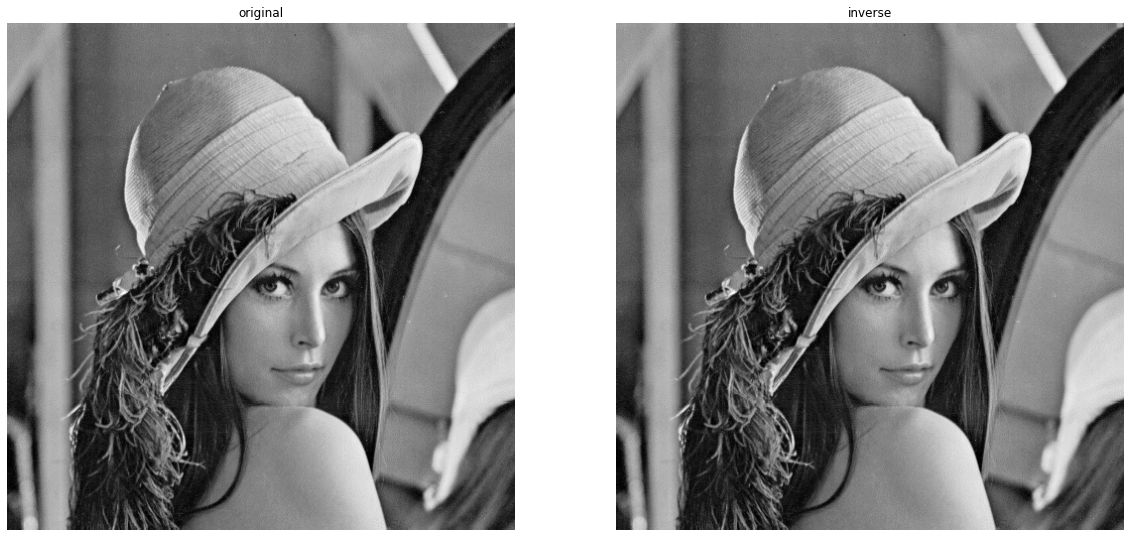

In [16]:
img = cv2.imread('lena.bmp',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShift = np.fft.fftshift(dft)
ishift = np.fft.ifftshift(dftShift)
iImg = cv2.idft(ishift)
iImg= cv2.magnitude(iImg[:,:,0],iImg[:,:,1])
fig, _ = plt.subplots(figsize = (20, 10))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('original'), plt.axis('off')
plt.subplot(122),plt.imshow(iImg, cmap = 'gray')
plt.title('inverse'), plt.axis('off')


# 高通濾波，將低頻率的值過濾掉

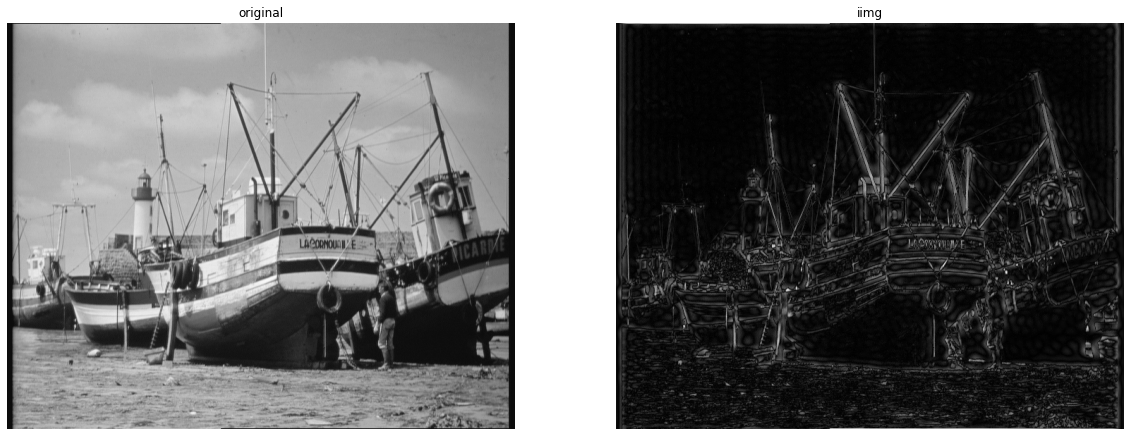

In [14]:
img = cv2.imread('boat.bmp',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
ishift = np.fft.ifftshift(fshift)
iimg = np.fft.ifft2(ishift)
iimg = np.abs(iimg)
fig, _ = plt.subplots(figsize = (20, 10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(iimg, cmap = 'gray')
plt.title('iimg'),plt.axis('off')
plt.show()


# 低通濾波，把高頻的值拿掉

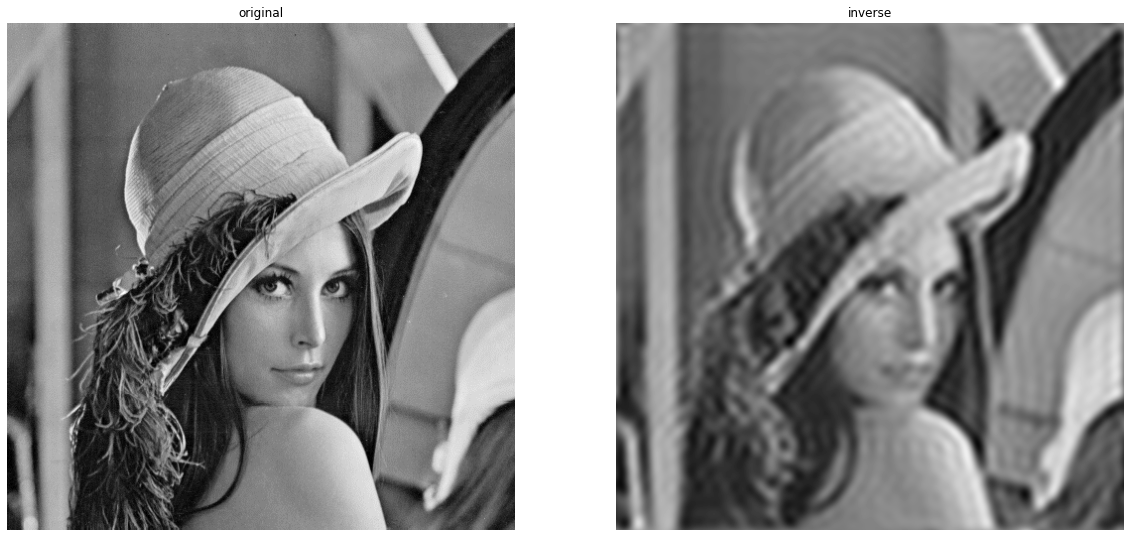

In [17]:
img = cv2.imread('lena.bmp',0)
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShift = np.fft.fftshift(dft)
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
mask = np.zeros((rows,cols,2),np.uint8)
#兩個通道，與頻域影像比對
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
fShift = dftShift*mask
ishift = np.fft.ifftshift(fShift)
iImg = cv2.idft(ishift)
iImg= cv2.magnitude(iImg[:,:,0],iImg[:,:,1])
fig, _ = plt.subplots(figsize = (20, 10))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('original'), plt.axis('off')
plt.subplot(122),plt.imshow(iImg, cmap = 'gray')
plt.title('inverse'), plt.axis('off')
plt.show()
